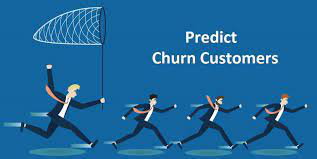

In [1]:
#display project image
from PIL import Image
import IPython.display as display

# Load the JPEG image
image = Image.open("image03.jpeg")

# Display the image in the notebook
display.display(image)


## CUSTOMER CHURN PREDICTION FOR SYRIATEL

STUDENT'S NAME :  JULIET WANJA THUKU
    
STUDENT PACE:  PART-TIME
    
INSTRUCTOR'S NAME : ASHA  DEEN
   

##  BUSINESS UNDERSTANDING

#  Introduction

In an ever-evolving and highly competitive telecommunications industry, understanding and mitigating customer churn is of paramount importance. The ability to predict when a customer is likely to terminate their relationship with SyriaTel can have a significant impact on business sustainability and profitability. The company wants to address this issue and by doing so we will be  developing a customer churn prediction model,that can identify potential churners among SyriaTel's customer base. The objective is  to equip SyriaTel with the tools and insights necessary to proactively retain valuable customers, optimize marketing strategies, and enhance overall customer satisfaction. This project represents a crucial step in harnessing data-driven decision-making to ensure the long-term success and growth of SyriaTel in a dynamic and competitive telecommunications market.

# project objective

* Distinguish the factors that are leading  and are more likely to lead to customer churn

* Develop an Accurate Predictive Model.we will  create a robust and accurate machine learning model that can forecast which customers are at risk of churning from SyriaTel's services. 

* Reduce Customer Churn.The primary goal is to significantly reduce customer churn rates, thereby retaining more customers and their associated revenue. By identifying potential churners early, SyriaTel can implement proactive strategies to retain these customers.

* Optimize Marketing and Retention Strategies by insights gained from the model to optimize marketing campaigns and customer retention strategies.

# DATA UNDERSTANDING

In [2]:
# import necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import sklearn

In [3]:
#load and read the data
data = pd.read_csv('Data3.csv')
data.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [4]:
#shape of dataframe
data.shape

(3333, 21)

The number of rows in our dataframe are 3333 and the The number of columns are 21


In [5]:
#check statistical summary of the data
data.describe()

account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

In [6]:
#summary check of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [7]:
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [8]:
# distingush the categorical and numerical columns
cat_cols = data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(exclude=['object']).columns

print("Categorical Columns:",cat_cols)

print("\nNumerical Columns:",num_cols)


Categorical Columns: Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')

Numerical Columns: Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


below is a brief explanation of what each column means:

# Categorical Columns:

* state: This column likely represents the state or location of the customers.

* phone number: This column probably contains unique phone numbers for each customer.

* international plan: This column may indicate whether the customer has an international calling plan.

* voice mail plan: This column may indicate whether the customer has a voice mail plan.


# Numerical Columns:

* account length: The length or duration of the customer's account with the telecommunications company.
* area code: The area code associated with the customer's phone number.
* number vmail messages: The number of voice mail messages the customer has.
* total day minutes: The total number of minutes the customer used for daytime (typically, during business hours) calls.
* total day calls: The total number of calls the customer made during the daytime.
* total day charge: The total charges for daytime calls.
* total eve minutes: The total number of minutes the customer used for evening calls.
* total eve calls: The total number of calls the customer made during the evening.
* total eve charge: The total charges for evening calls.
* total night minutes: The total number of minutes the customer used for nighttime calls.
* total night calls: The total number of calls the customer made during the nighttime.
* total night charge: The total charges for nighttime calls.
* total intl minutes: The total number of international minutes used by the customer.
* total intl calls: The total number of international calls made by the customer.
* total intl charge: The total charges for international calls.
* customer service calls: The number of customer service calls made by the customer.
* churn: Churn typically means the customer has left the service. A binary column indicating whether the customer has churned (1 for churned, 0 for not churned). 



## DATA PREPARATION


we will perform data cleaning, conduct(EDA) exploratory data analysis , and data preprocessing.

# data cleaning and EDA(exploratory data analysis)

For our data cleaning we are going to be dealing with the missing values and handling them and also checking if our data has duplicates.
For EDA we'll involve the initial investigation and examination of our dataset to understand its key characteristics, patterns, and underlying structure.we will identify Data Quality Issues,uncover patterns, trends, and relationships between variables. here we will identify correlations, dependencies, and anomalies in the data,and as we code along we will discover many other techniques for exploration

In [9]:
#checking for missing values
missing_values = data.isnull().sum()
missing_values

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

You can note that our data does not contain any missing values which is a good thing for our analysis.

In [10]:
#identify  if there are any duplicates in our data
data.duplicated().sum

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Length: 3333, dtype: bool>

hurray! we also do not have any duplicates in our dataframe

## univariant analysis

* distribution for the numeric features

Summary statistics for account length:
count    3333.000000
mean      101.064806
std        39.822106
min         1.000000
25%        74.000000
50%       101.000000
75%       127.000000
max       243.000000
Name: account length, dtype: float64


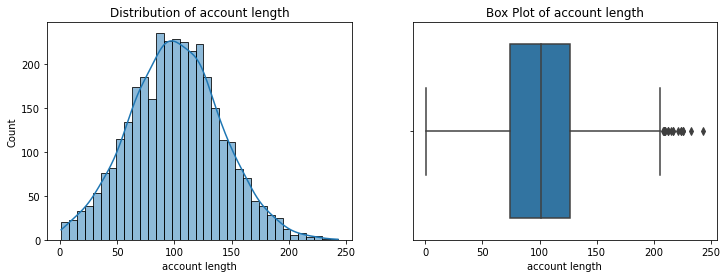

Summary statistics for area code:
count    3333.000000
mean      437.182418
std        42.371290
min       408.000000
25%       408.000000
50%       415.000000
75%       510.000000
max       510.000000
Name: area code, dtype: float64


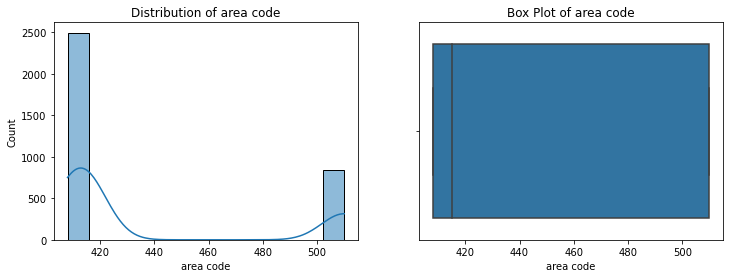

Summary statistics for number vmail messages:
count    3333.000000
mean        8.099010
std        13.688365
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        51.000000
Name: number vmail messages, dtype: float64


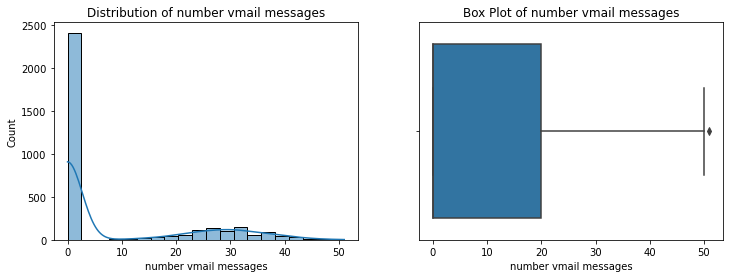

Summary statistics for total day minutes:
count    3333.000000
mean      179.775098
std        54.467389
min         0.000000
25%       143.700000
50%       179.400000
75%       216.400000
max       350.800000
Name: total day minutes, dtype: float64


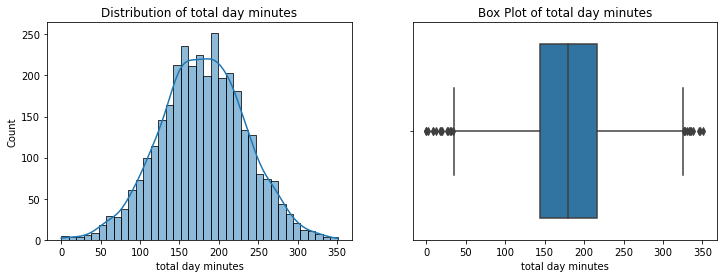

Summary statistics for total day calls:
count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: total day calls, dtype: float64


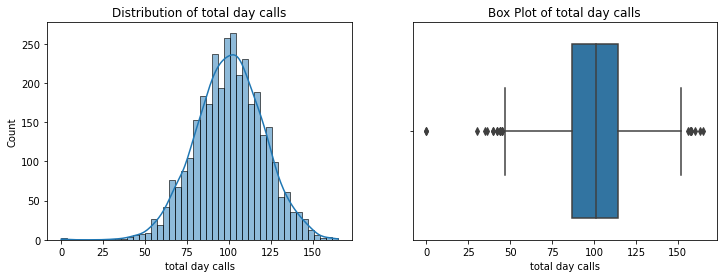

Summary statistics for total day charge:
count    3333.000000
mean       30.562307
std         9.259435
min         0.000000
25%        24.430000
50%        30.500000
75%        36.790000
max        59.640000
Name: total day charge, dtype: float64


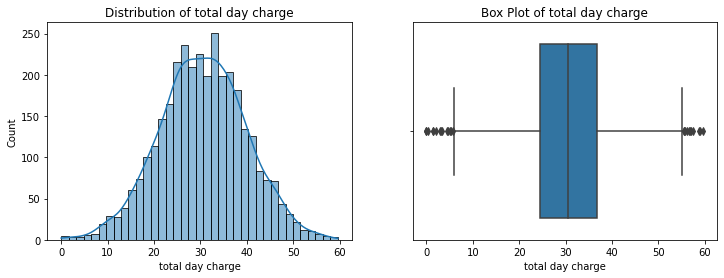

Summary statistics for total eve minutes:
count    3333.000000
mean      200.980348
std        50.713844
min         0.000000
25%       166.600000
50%       201.400000
75%       235.300000
max       363.700000
Name: total eve minutes, dtype: float64


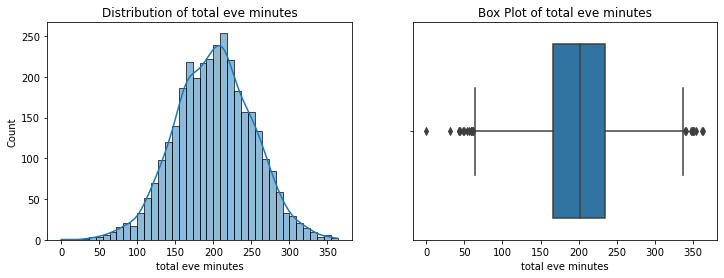

Summary statistics for total eve calls:
count    3333.000000
mean      100.114311
std        19.922625
min         0.000000
25%        87.000000
50%       100.000000
75%       114.000000
max       170.000000
Name: total eve calls, dtype: float64


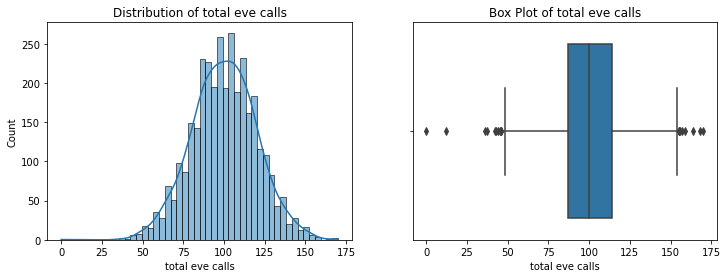

Summary statistics for total eve charge:
count    3333.000000
mean       17.083540
std         4.310668
min         0.000000
25%        14.160000
50%        17.120000
75%        20.000000
max        30.910000
Name: total eve charge, dtype: float64


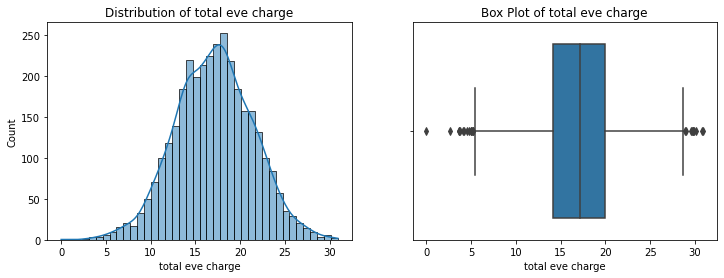

Summary statistics for total night minutes:
count    3333.000000
mean      200.872037
std        50.573847
min        23.200000
25%       167.000000
50%       201.200000
75%       235.300000
max       395.000000
Name: total night minutes, dtype: float64


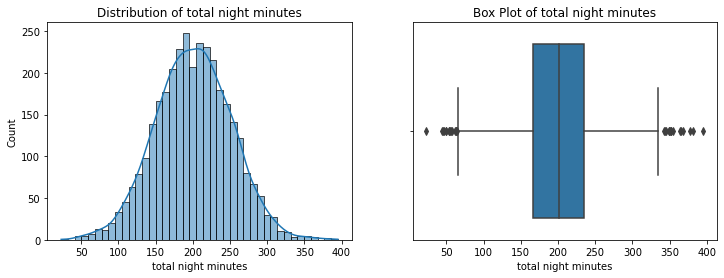

Summary statistics for total night calls:
count    3333.000000
mean      100.107711
std        19.568609
min        33.000000
25%        87.000000
50%       100.000000
75%       113.000000
max       175.000000
Name: total night calls, dtype: float64


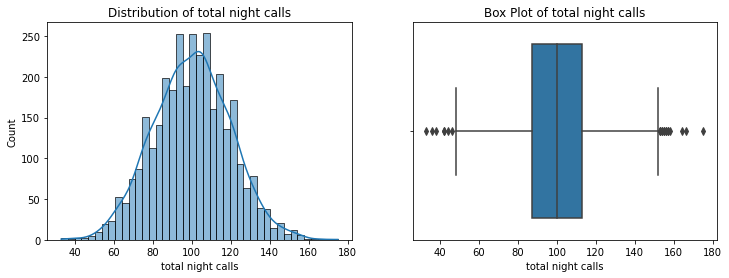

Summary statistics for total night charge:
count    3333.000000
mean        9.039325
std         2.275873
min         1.040000
25%         7.520000
50%         9.050000
75%        10.590000
max        17.770000
Name: total night charge, dtype: float64


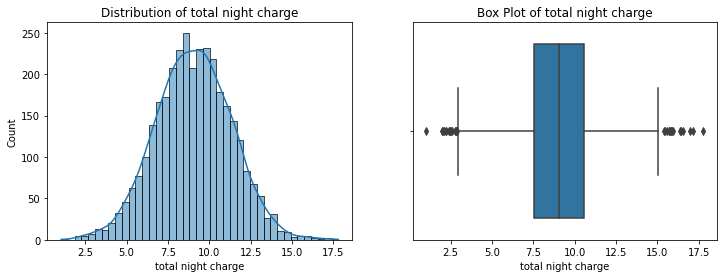

Summary statistics for total intl minutes:
count    3333.000000
mean       10.237294
std         2.791840
min         0.000000
25%         8.500000
50%        10.300000
75%        12.100000
max        20.000000
Name: total intl minutes, dtype: float64


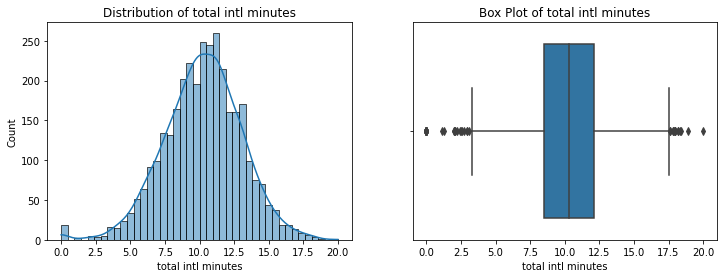

Summary statistics for total intl calls:
count    3333.000000
mean        4.479448
std         2.461214
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        20.000000
Name: total intl calls, dtype: float64


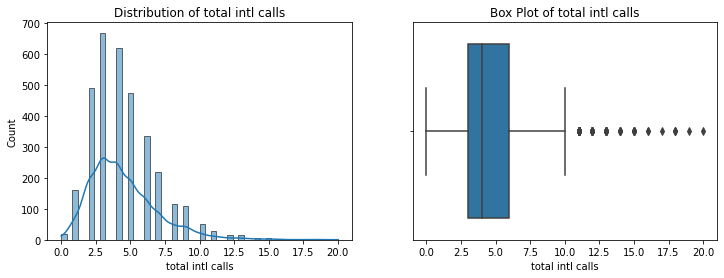

Summary statistics for total intl charge:
count    3333.000000
mean        2.764581
std         0.753773
min         0.000000
25%         2.300000
50%         2.780000
75%         3.270000
max         5.400000
Name: total intl charge, dtype: float64


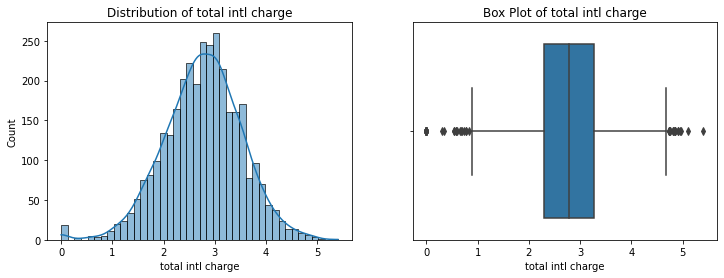

Summary statistics for customer service calls:
count    3333.000000
mean        1.562856
std         1.315491
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: customer service calls, dtype: float64


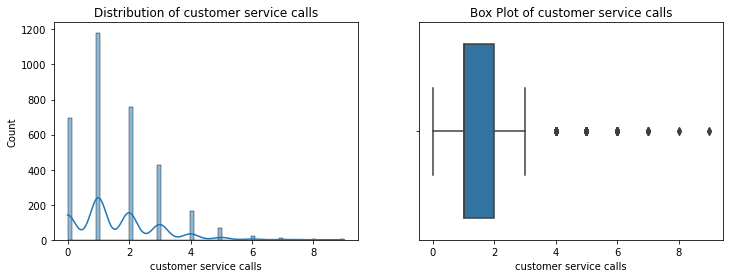

In [11]:
# Univariate analysis for our numerical columns
# Select numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
# Summary statistics
    print(f"Summary statistics for {col}:")
    print(data[col].describe())
    
# Create subplots for the histogram and box plot
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
# Plot a histogram
    sns.histplot(data[col], kde=True, ax=axes[0])
    axes[0].set_title(f"Distribution of {col}")
    
# Plot a box plot
    sns.boxplot(x=data[col], ax=axes[1])
    axes[1].set_title(f"Box Plot of {col}")
    
    plt.show()


The above observations provide a snapshot of the dataset's features and suggest some potential areas for further analysis or investigation. For example:

The high variability in usage patterns e.g., total day minutes suggests that different customer segments may exist within the dataset.
The distribution of customer service calls indicates that most customers do not require extensive support, but there are a few who make multiple calls.
The presence of zero values in some features e.g., voicemail messages suggests that there are customers who do not use those services.
These insights can be used to guide further data analysis.

In [12]:
# the count of how churn has been distributed
churn_distribution = data["churn"].value_counts()
print(churn_distribution)


False    2850
True      483
Name: churn, dtype: int64


In [13]:
# Calculate the percentage
not_churn = (churn_distribution[0] / churn_distribution.sum()) * 100
churn = (churn_distribution[1] / churn_distribution.sum()) * 100

print(f" 'Not Churn': {not_churn:.2f}%")
print(f" 'Churn': {churn:.2f}%")


 'Not Churn': 85.51%
 'Churn': 14.49%


In [14]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Bar(x=["Not Churn", "Churn"], y=data["churn"].value_counts())])
fig.update_layout(title="Churn Distribution", xaxis=dict(tickvals=[0, 1], ticktext=["Not Churn", "Churn"]), width=400, height=300)
fig.show()


This distribution indicates that there  483 customers that have terminated their contract which makes that 14.49% of the 3333 customers that we have in our datset ,whilst those who have not make 85.51%.In this case, the dataset is imbalanced with a significantly higher number of instances in the "Not Churn" class compared to the "Churn" class. Class imbalance can have implications for machine learning model training and evaluation. When the classes are imbalanced, the model might have a bias towards the majority class and might not perform as well in predicting the minority class.

* Distribution of area code

In [15]:
#find the unid=que values in area code
data["area code"].unique()


array([415, 408, 510], dtype=int64)

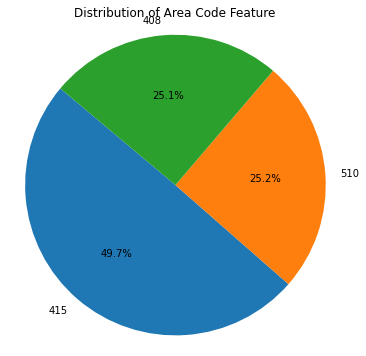

In [16]:
#calculates the value counts
area = data['area code'].value_counts()
#extract the unique area codes 
transaction = area.index
#extract the counts of each area code 
quantity = area.values

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(quantity, labels=transaction, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Area Code Feature')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


Approximately half (50%) of the customers are in area code 415.

About one-fourth (25%) of the customers are in area code 510.

Another one-fourth (25%) of the customers are in area code 408.

# destribution of categorical fetures

* states

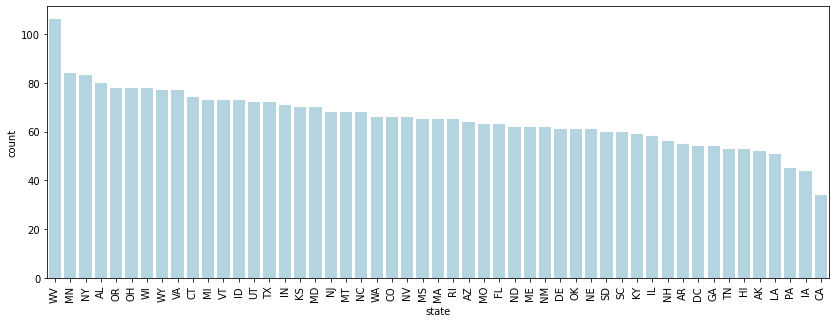

In [17]:
#Checking the distribution of categorical features:states
def plot_categorical_distribution(data, feature):
    
    plt.figure(figsize=(14, 5))
    sns.countplot(x=feature, data=data,color='lightblue', order=data[feature].value_counts().index)
    plt.xticks(rotation=90)
    plt.show()
plot_categorical_distribution(data, 'state')

* voice-mail plan

no     2411
yes     922
Name: voice mail plan, dtype: int64


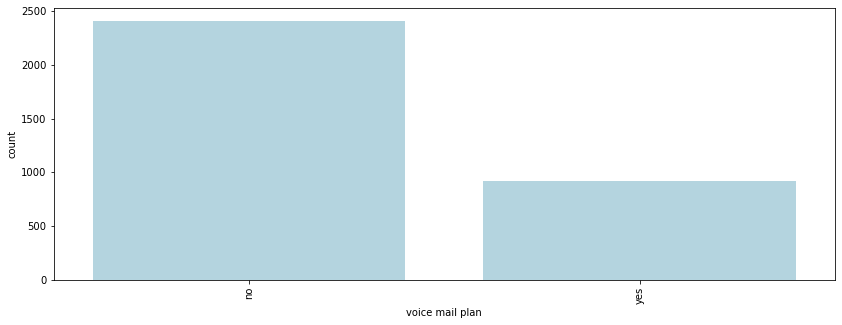

In [18]:
#get the count of client that had a voice mail plan
voice_mail= data['voice mail plan'].value_counts()
print(voice_mail)
#plot the distribution
plot_categorical_distribution(data, 'voice mail plan')

There were 922 clients who had a voice mail plan

* international plan

In [19]:
#find the count of customers with an international plan
data['international plan'].value_counts()

no     3010
yes     323
Name: international plan, dtype: int64

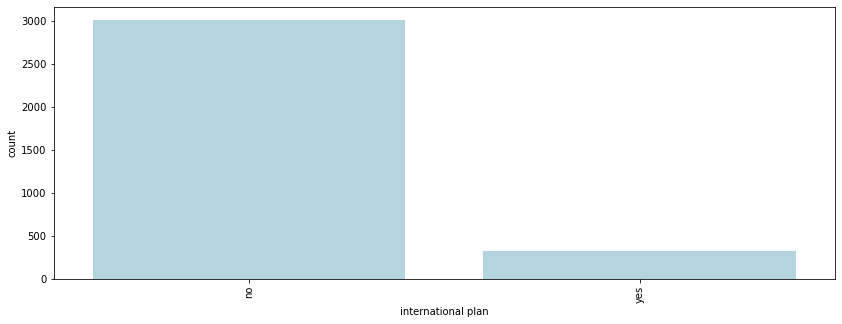

In [20]:
# plot the distribution
plot_categorical_distribution(data,'international plan')
        

You can notice that there were very few customers who had international plan

# Bivariate Analysis

We will use this data analysis technique that involves the simultaneous examination of two variables to explore and understand the relationships between the variables

* Check the distribution of categorical features based on churn rate

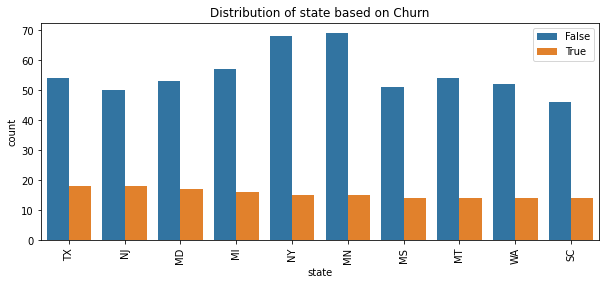

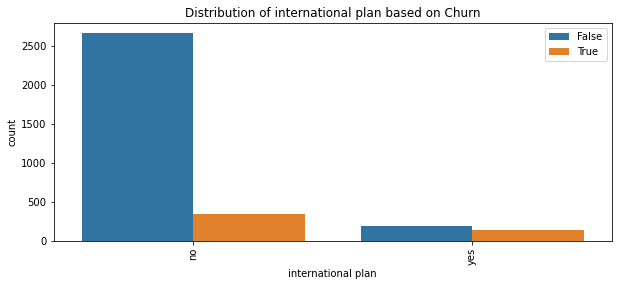

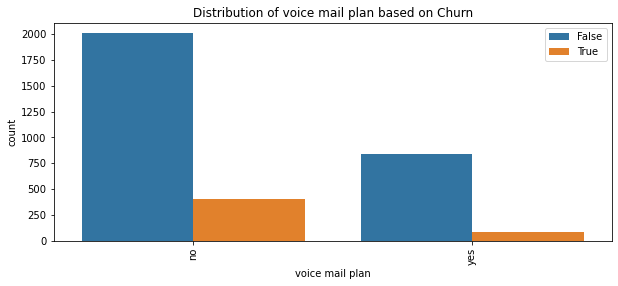

In [21]:
def plot_categorical_distributions(data, features):
    
    for feature in features:
        plt.figure(figsize=(10, 4))
        churn_counts = data.groupby(feature)["churn"].sum().sort_values(ascending=False)
        top_10_categories = churn_counts.head(10).index.tolist()
        sns.countplot(x=feature, hue="churn", data=data, order=top_10_categories)
        plt.xticks(rotation=90)
        plt.legend(loc="upper right")
        plt.title(f'Distribution of {feature} based on Churn')
        plt.show()

# Specify the categorical features you want to plot
categorical_features = ['state', 'international plan', 'voice mail plan']

# Call the function to plot the distributions for the specified features
plot_categorical_distributions(data, categorical_features)


From the above we find that :

* Geographic Distribution of Churned Customers:

The majority of churned customers are concentrated in specific states, including Texas, New Jersey, Maryland, Miami, and New York.

* International Plan Usage:

A significant portion of customers who churned did not have an international plan, indicating that this group is more likely to discontinue their service.

* Voicemail Plan Usage:

A considerable number of customers who churned also did not have a voicemail plan, suggesting that the absence of this service is associated with a higher churn rate.

* AREA CODE WITH THE HIGHEST CHURN RATE

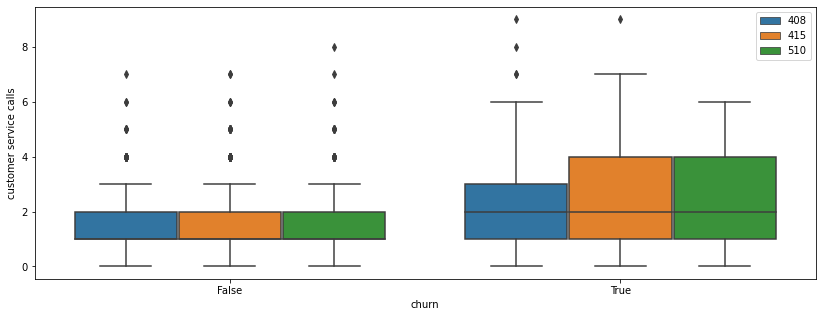

In [22]:
#  plot a Boxplot to see which area code has the highest churn
plt.figure(figsize=(14,5))
sns.boxplot(data=data,x='churn',y='customer service calls',hue='area code');
plt.legend(loc='upper right');

The majority of customers who have terminated their accounts are from area codes 415 and 510.
It's worth noting that there are several outliers within the data, suggesting that a subset of customers in these area codes has experienced churn.

 * CHURN DISTRIBUTION BY CHARGE TYPE

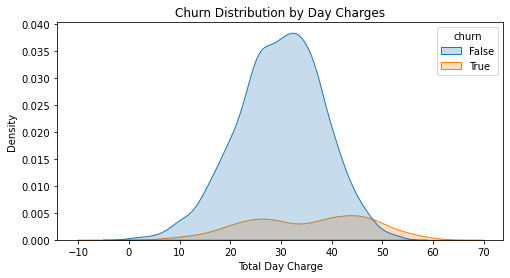

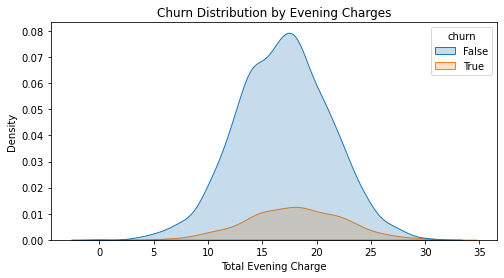

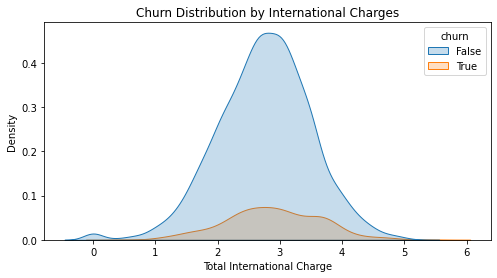

In [23]:
def plot_churn_kde(data, x_column, charge_type):
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=data, x=x_column, hue='churn', fill=True)
    plt.xlabel(f'Total {charge_type} Charge')
    plt.ylabel('Density')
    plt.title(f'Churn Distribution by {charge_type} Charges')
    plt.show()

# Plot Churn by day charges
plot_churn_kde(data, 'total day charge', 'Day')

# Plot Churn by evening charges
plot_churn_kde(data, 'total eve charge', 'Evening')

# Plot Churn by international charges
plot_churn_kde(data, 'total intl charge', 'International')


* Churn and Day Charges:

Customers who have terminated their accounts tend to have higher total day charges than those who haven't. This implies that dissatisfaction or cost concerns during the day may increase the likelihood of churning.

* Churn and Evening Charges:

Similar to the day charges, customers who've terminated their accounts have higher total evening charges. This indicates that dissatisfaction or cost issues in the evening might also contribute to churn.

* Churn and International Charges:

The plot suggests a slight association between higher total international charges and a slightly higher likelihood of churning.

# OUTLIERS

In [24]:
from scipy import stats
def drop_numerical_outliers(data, z_thresh=3):
    constrains = data.select_dtypes(include=[np.number]).apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    data.drop(data.index[~constrains], inplace=True)
    
drop_numerical_outliers(data)
print(data.shape)


(3169, 21)


Aftrer getting the shape of our dataframe you can notice that it has devieted from the original 3333,21.But we can be sure as we proceed outliers will not have any effect to our modelling

# correlation of features to the target variable (churn)

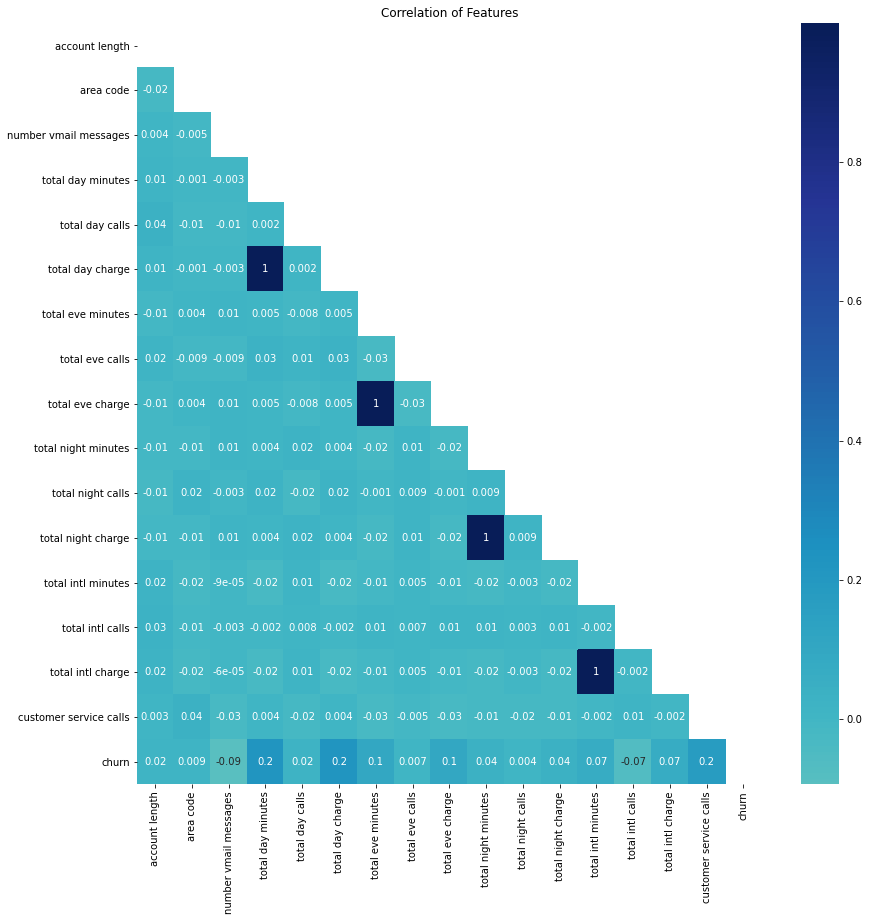

In [25]:
def plot_correlation_matrix(data):
    ''' This function plots a correlation matrix for our dataframe '''
    plt.figure(figsize=(14, 14))

    corr = data.corr()

    # Generate a mask to only show the lower triangle
    mask = np.triu(np.ones(corr.shape), k=0)

    sns.heatmap(data=corr, annot=True, cmap='YlGnBu', center=0, fmt='.1g', mask=mask)
    plt.title('Correlation of Features')
    plt.show()

plot_correlation_matrix(data)

# Display the plot
plt.show()


some of the features share a perfect correlation,but most are not correlated 

- Total eve charge and total eve minutes features are fully positively correlated.
- Total night charge and total night minutes features are fully positively correlated.
- Total day charge and total day minutes features are fully positively correlated.
- Total int charge and total int minutes features are fully positively correlated.

#  Multicollinearity

we'll use this technique  to study the relationship between our dependent variable and two or more independent variables

In [26]:
data.columns


Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [27]:
# Calculate the correlation matrix and take the absolute value
corr_matrix = data.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.90)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.90)]

# Display correlated features
print("Highly correlated features:")
print(to_drop)


data = data.drop(to_drop, axis=1) 
# Drop the features

Highly correlated features:
['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']


In [28]:
data

state  account length  area code phone number international plan  \
0       KS             128        415     382-4657                 no   
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
4       OK              75        415     330-6626                yes   
...    ...             ...        ...          ...                ...   
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day calls  \
0                yes                     25              110   
1                yes                     26              123   
2                 no                      0              114   
3                 no                      0               71   
4                 no                      0              113   
...              ...                    ...              ...   
3328             yes                     36               77   
3329              no                      0               57   
3330              no                      0              109   
3331              no                      0              105   
3332             yes                     25              113   

      total day charge  total eve calls  total eve charge  total night calls  \
0                45.07               99             16.78                 91   
1                27.47              103             16.62                103   
2                41.38              110             10.30                104   
3                50.90               88              5.26                 89   
4                28.34              122             12.61                121   
...                ...              ...               ...                ...   
3328             26.55              126             18.32                 83   
3329             39.29               55             13.04                123   
3330             30.74               58             24.55                 91   
3331             36.35               84             13.57                137   
3332             39.85               82             22.60                 77   

      total night charge  total intl calls  total intl charge  \
0                  11.01                 3               2.70   
1                  11.45                 3               3.70   
2                   7.32                 5               3.29   
3                   8.86                 7               1.78   
4                   8.41                 3               2.73   
...                  ...               ...                ...   
3328               12.56                 6               2.67   
3329                8.61                 4               2.59   
3330                8.64                 6               3.81   
3331                6.26                10               1.35   
3332               10.86                 4               3.70   

      customer service calls  churn  
0                          1  False  
1                          1  False  
2                          0  False  
3                          2  False  
4                          3  False  
...                      ...    ...  
3328                       2  False  
3329                       3  False  
3330                       2  False  
3331                       2  False  
3332                       0  False  

[3169 rows x 17 columns]

In [29]:
#drop the phone number column because it has no relevance in our modeling
#Dropping the 'phone number' column
data_df = data.drop("phone number", axis=1)

In [30]:
data_df

state  account length  area code international plan voice mail plan  \
0       KS             128        415                 no             yes   
1       OH             107        415                 no             yes   
2       NJ             137        415                 no              no   
3       OH              84        408                yes              no   
4       OK              75        415                yes              no   
...    ...             ...        ...                ...             ...   
3328    AZ             192        415                 no             yes   
3329    WV              68        415                 no              no   
3330    RI              28        510                 no              no   
3331    CT             184        510                yes              no   
3332    TN              74        415                 no             yes   

      number vmail messages  total day calls  total day charge  \
0                        25              110             45.07   
1                        26              123             27.47   
2                         0              114             41.38   
3                         0               71             50.90   
4                         0              113             28.34   
...                     ...              ...               ...   
3328                     36               77             26.55   
3329                      0               57             39.29   
3330                      0              109             30.74   
3331                      0              105             36.35   
3332                     25              113             39.85   

      total eve calls  total eve charge  total night calls  \
0                  99             16.78                 91   
1                 103             16.62                103   
2                 110             10.30                104   
3                  88              5.26                 89   
4                 122             12.61                121   
...               ...               ...                ...   
3328              126             18.32                 83   
3329               55             13.04                123   
3330               58             24.55                 91   
3331               84             13.57                137   
3332               82             22.60                 77   

      total night charge  total intl calls  total intl charge  \
0                  11.01                 3               2.70   
1                  11.45                 3               3.70   
2                   7.32                 5               3.29   
3                   8.86                 7               1.78   
4                   8.41                 3               2.73   
...                  ...               ...                ...   
3328               12.56                 6               2.67   
3329                8.61                 4               2.59   
3330                8.64                 6               3.81   
3331                6.26                10               1.35   
3332               10.86                 4               3.70   

      customer service calls  churn  
0                          1  False  
1                          1  False  
2                          0  False  
3                          2  False  
4                          3  False  
...                      ...    ...  
3328                       2  False  
3329                       3  False  
3330                       2  False  
3331                       2  False  
3332                       0  False  

[3169 rows x 16 columns]

Above we have identified highly correlated features based on a threshold of 0.90.we checks if any of the correlation coefficients in a column are greater than 0.90. If there are highly correlated features, their column names are added to the to_drop list.
Dropping features with the highest multicollinearity will help  improve the quality and performance of our predictive models, enhance their interpretability, and ensure that the models are less sensitive to noise and redundancy in the data. It's a way to focus on the most relevant and non-redundant information for our analysis 

# Feature Engeneering

In this process we will create new features by modifying existing ones to make the data more suitable for modeling. The goal of this process is to improve the performance of machine learning models, increase interpretability, and extract relevant information from the raw data. 

# label encoding 

we'll Assigning a unique integer to each category.

In [31]:
#import class labelencoder
from sklearn.preprocessing import LabelEncoder
# creates an instance of the LabelEncoder class
label_encoder = LabelEncoder()
#fit the label encoder to the unique labels in the 'churn' column
data_df['churn'] = label_encoder.fit_transform(data_df['churn'])

# One Hot Encoding

we will create binary columns for each category in a categorical variable.

In [32]:
#convert categorical variables (columns with discrete categories) into binary variables
df= pd.get_dummies(data_df, columns=['state', 'area code', 'international plan', 'voice mail plan'])
df.head()

account length  number vmail messages  total day calls  total day charge  \
0             128                     25              110             45.07   
1             107                     26              123             27.47   
2             137                      0              114             41.38   
3              84                      0               71             50.90   
4              75                      0              113             28.34   

   total eve calls  total eve charge  total night calls  total night charge  \
0               99             16.78                 91               11.01   
1              103             16.62                103               11.45   
2              110             10.30                104                7.32   
3               88              5.26                 89                8.86   
4              122             12.61                121                8.41   

   total intl calls  total intl charge  ...  state_WI  state_WV  state_WY  \
0                 3               2.70  ...         0         0         0   
1                 3               3.70  ...         0         0         0   
2                 5               3.29  ...         0         0         0   
3                 7               1.78  ...         0         0         0   
4                 3               2.73  ...         0         0         0   

   area code_408  area code_415  area code_510  international plan_no  \
0              0              1              0                      1   
1              0              1              0                      1   
2              0              1              0                      1   
3              1              0              0                      0   
4              0              1              0                      0   

   international plan_yes  voice mail plan_no  voice mail plan_yes  
0                       0                   0                    1  
1                       0                   0                    1  
2                       0                   1                    0  
3                       1                   1                    0  
4                       1                   1                    0  

[5 rows x 70 columns]

In [33]:
df.head()

account length  number vmail messages  total day calls  total day charge  \
0             128                     25              110             45.07   
1             107                     26              123             27.47   
2             137                      0              114             41.38   
3              84                      0               71             50.90   
4              75                      0              113             28.34   

   total eve calls  total eve charge  total night calls  total night charge  \
0               99             16.78                 91               11.01   
1              103             16.62                103               11.45   
2              110             10.30                104                7.32   
3               88              5.26                 89                8.86   
4              122             12.61                121                8.41   

   total intl calls  total intl charge  ...  state_WI  state_WV  state_WY  \
0                 3               2.70  ...         0         0         0   
1                 3               3.70  ...         0         0         0   
2                 5               3.29  ...         0         0         0   
3                 7               1.78  ...         0         0         0   
4                 3               2.73  ...         0         0         0   

   area code_408  area code_415  area code_510  international plan_no  \
0              0              1              0                      1   
1              0              1              0                      1   
2              0              1              0                      1   
3              1              0              0                      0   
4              0              1              0                      0   

   international plan_yes  voice mail plan_no  voice mail plan_yes  
0                       0                   0                    1  
1                       0                   0                    1  
2                       0                   1                    0  
3                       1                   1                    0  
4                       1                   1                    0  

[5 rows x 70 columns]

# Feature Scaling:

Scaling features will help ensure that the features have similar magnitudes, which can be important for certain algorithms like gradient descent-based methods.

In [34]:
#import the MinMaxScaler class
from sklearn.preprocessing import MinMaxScaler
#instanciate the MinMaxScaler class
scaler = MinMaxScaler()
#reshapes the data to ensure it is a 2D array, which is required by the scaler.
def scaling(columns):
    return scaler.fit_transform(df[columns].values.reshape(-1, 1))

for i in df.select_dtypes(include=[np.number]).columns:
    df[i] = scaling(i)
#load dataframe
data_df.head()


state  account length  area code international plan voice mail plan  \
0    KS             128        415                 no             yes   
1    OH             107        415                 no             yes   
2    NJ             137        415                 no              no   
3    OH              84        408                yes              no   
4    OK              75        415                yes              no   

   number vmail messages  total day calls  total day charge  total eve calls  \
0                     25              110             45.07               99   
1                     26              123             27.47              103   
2                      0              114             41.38              110   
3                      0               71             50.90               88   
4                      0              113             28.34              122   

   total eve charge  total night calls  total night charge  total intl calls  \
0             16.78                 91               11.01                 3   
1             16.62                103               11.45                 3   
2             10.30                104                7.32                 5   
3              5.26                 89                8.86                 7   
4             12.61                121                8.41                 3   

   total intl charge  customer service calls  churn  
0               2.70                       1      0  
1               3.70                       1      0  
2               3.29                       0      0  
3               1.78                       2      0  
4               2.73                       3      0

##  MODELING

Hurrah! we have got to the most crutial part of the project, in  modeling we are going to build and train predictive models using our prepared and processed data. The choice of modeling techniques and algorithms will be :

* Logistic Regression
* Decision Tree
* Random Forest
* K-Nearest Neighbors (K-NN)

 algorithms 

* Defining our variables X and y

y will be our target variable

In [35]:
# define our variables
X = df.drop("churn", axis=1)
y = df["churn"]

# Train-Test Split
splitting data into training and testing sets is essential for assessing a model's performance, preventing overfitting, tuning hyperparameters, and selecting the best model. It ensures that your machine learning model can make reliable predictions on new, unseen data, which is a key goal in this project

In [36]:
# import the necessary class 
from sklearn.model_selection import train_test_split
#splitting the data in to train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=130)

# Oversampling
Oversampling involves increasing the number of instances in the minority class. we will do this  by duplicating samples or generating synthetic samples using methods like SMOTE (Synthetic Minority Over-sampling Technique).

In [37]:
from imblearn.over_sampling import SMOTENC
#instantiate SMOTENC
smote = SMOTENC(categorical_features=[1, 2], random_state=123)
resampled_X_train, resampled_y_train = smote.fit_resample(X_train, y_train)


## LOGISTIC REGRESSION

it is statistical method used for binary classification problems. It models the probability that a given input belongs to a particular class.

In [38]:
df.head()

account length  number vmail messages  total day calls  total day charge  \
0        0.587963               0.510204         0.576271          0.773956   
1        0.490741               0.530612         0.686441          0.450248   
2        0.629630               0.000000         0.610169          0.706088   
3        0.384259               0.000000         0.245763          0.881184   
4        0.342593               0.000000         0.601695          0.466250   

   total eve calls  total eve charge  total night calls  total night charge  \
0         0.487179          0.490082           0.422414            0.643644   
1         0.521368          0.483858           0.525862            0.675974   
2         0.581197          0.238040           0.534483            0.372520   
3         0.393162          0.042007           0.405172            0.485672   
4         0.683761          0.327888           0.681034            0.452608   

   total intl calls  total intl charge  ...  state_WI  state_WV  state_WY  \
0               0.2           0.487585  ...       0.0       0.0       0.0   
1               0.2           0.713318  ...       0.0       0.0       0.0   
2               0.4           0.620767  ...       0.0       0.0       0.0   
3               0.6           0.279910  ...       0.0       0.0       0.0   
4               0.2           0.494357  ...       0.0       0.0       0.0   

   area code_408  area code_415  area code_510  international plan_no  \
0            0.0            1.0            0.0                    1.0   
1            0.0            1.0            0.0                    1.0   
2            0.0            1.0            0.0                    1.0   
3            1.0            0.0            0.0                    0.0   
4            0.0            1.0            0.0                    0.0   

   international plan_yes  voice mail plan_no  voice mail plan_yes  
0                     0.0                 0.0                  1.0  
1                     0.0                 0.0                  1.0  
2                     0.0                 1.0                  0.0  
3                     1.0                 1.0                  0.0  
4                     1.0                 1.0                  0.0  

[5 rows x 70 columns]

In [39]:
# Import Necessary Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#instantiate the logistic regression
logreg = LogisticRegression(random_state=130)
# Fit the model on the training data 
logreg.fit(resampled_X_train, resampled_y_train)
#predict on the labels of test set
y_pred_log = logreg.predict(X_test)

- confusion matrix

we will use a confusion metrix which is a table that will describe the performance of our classification model on a set of test data for which the true values are known. It will allows you to understand how well your model is doing in terms of making correct and incorrect predictions.

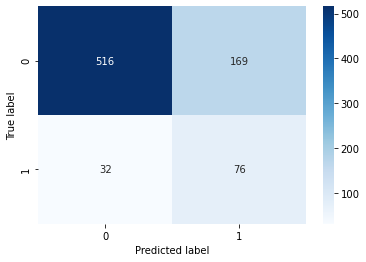

In [40]:
#defines a function
def plot_confusion_matrix(y_true, y_pred, classes):
    """
    Plots a confusion matrix.
    """
   #Calculate the Confusion Matrix 
    cm = confusion_matrix(y_true, y_pred)
    #Create a Plot
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()
    #Display the Plot
plot_confusion_matrix(y_test, y_pred_log, [0,1])


In [41]:
# re4turn a classification summary reeport
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

         0.0       0.94      0.75      0.84       685
         1.0       0.31      0.70      0.43       108

    accuracy                           0.75       793
   macro avg       0.63      0.73      0.63       793
weighted avg       0.86      0.75      0.78       793



This classification report provides a detailed assessment of the model's performance for two classes (0 and 1) and overall model accuracy. It's important to note that:

For class 0 (0.0), the model has a high precision of 0.94, indicating that when it predicts class 0, it is correct 94% of the time. However, recall is 0.75, which means it correctly identifies 75% of the actual class 0 instances. The F1-Score is 0.84.

For class 1 (1.0), the model has a lower precision of 0.31, indicating that when it predicts class 1, it is correct 31% of the time. However, recall is higher at 0.70, indicating that it correctly identifies 70% of the actual class 1 instances. The F1-Score is 0.43.

The overall accuracy of the model is 75%, which means it correctly classifies 75% of the instances in the test dataset.

The macro-average provides an average of precision, recall, and F1-Score across both classes.

The weighted average considers the class support and provides a weighted average of precision, recall, and F1-Score, where classes with more instances have a greater impact on the average.

In this case, the model performs relatively well for class 0 with a high precision but less well for class 1, as indicated by the lower precision. The classification report gives you insights into how the model performs for different classes and can help you make informed decisions about model tuning or adjustments.







Top Three Most Important Features:
total day charge          4.661654
customer service calls    3.030934
total eve charge          2.558701
dtype: float64


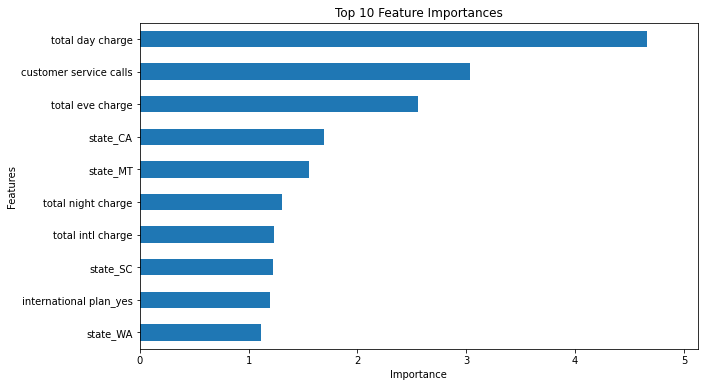

In [42]:
# Feature Importances
# retrieve the feature importances 
importance = logreg.coef_[0]

#retrieve the names of the features

feature_names = resampled_X_train.columns

# creates a Pandas Series with feature importances
feature_importances = pd.Series(importance,index=feature_names)

#sorts the feature importances in descending order
feature_importances = feature_importances.sort_values(ascending=False)

#plot
plt.figure(figsize=(10, 6))
top_features = feature_importances[:10]  # Select the top 10 features
top_features.sort_values().plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances')
#Adjusts the x-axis limits to ensure that the plot covers the full range of feature importances.
plt.xlim(0, max(top_features)* 1.1)  

# Print the top three most important features
top_three_features = feature_importances[:3]
print("Top Three Most Important Features:")
print(top_three_features)

# display the plot
plt.show() 

The overall accuracy  as we note above of our model is 75%, which means it correctly classifies 75% of the instances in the test dataset.and according to the model

Top Three Most Important Features:
- total day charge          4.661654
- customer service calls    3.030934
- total eve charge          2.558701

## DECISION  TREE  CLASSIFIER
A decision tree is a popular machine learning algorithm which works by recursively splitting the dataset into subsets based on the most significant attribute, creating a tree-like structure that helps make decisions. Decision trees can be used for  predicting class labels for instances based on the attributes.

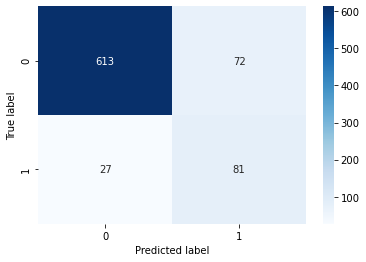

              precision    recall  f1-score   support

         0.0       0.96      0.89      0.93       685
         1.0       0.53      0.75      0.62       108

    accuracy                           0.88       793
   macro avg       0.74      0.82      0.77       793
weighted avg       0.90      0.88      0.88       793



In [43]:
#import decision tree classifier
from sklearn.tree import DecisionTreeClassifier
#Instantiate DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=130)

#Fit on the training data
dt_clf.fit(resampled_X_train,resampled_y_train)

#predict on the test set
y_pred_dt = dt_clf.predict(X_test)
plot_confusion_matrix(y_test, y_pred_dt, [0,1])

# print the classification report
print(classification_report(y_test,y_pred_dt))

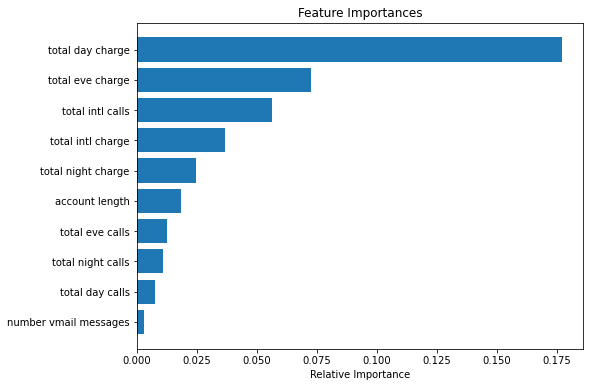

In [44]:
# Feature Importances
feature_names = list(resampled_X_train.columns)
importances = dt_clf.feature_importances_[0:10]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')


plt.show()

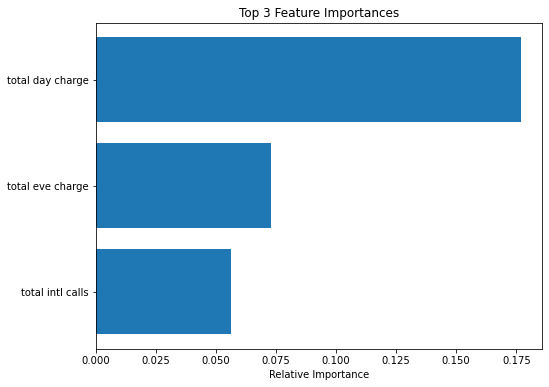

In [45]:
# Get the top three most important features
top_features_indices = indices[-3:]

plt.figure(figsize=(8,6))
plt.title('Top 3 Feature Importances')
plt.barh(range(len(top_features_indices)), importances[top_features_indices], align='center')
plt.yticks(range(len(top_features_indices)), [feature_names[i] for i in top_features_indices])
plt.xlabel('Relative Importance')
plt.show()




- The model achieves an accuracy of 88%, indicating that 88% of the instances are correctly classified.
- The macro average of precision, recall, and F1-score is shown to be relatively balanced for both classes. However, there is room for improvement in class 1.0's precision and F1-score.
- The weighted average accounts for class imbalance and provides an overall summary of model performance, which is also quite good.

 The model performs well in identifying class 0.0 (the negative class) with high precision, recall, and F1-score. However, for class 1.0 (the positive class), there is room for improvement in precision and F1-score. The overall model accuracy is good, but depending on the specific application and goals, further tuning and improvement may be needed, especially in terms of correctly identifying class 1.0 instances.
 
According to the model, total day charge, total eve charge, total intl call are the top three most important features.

## K-Nearest Neighbors

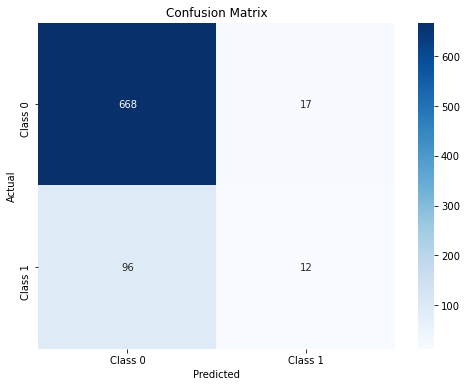

In [46]:
#import kneighbor classifier
from sklearn.neighbors import KNeighborsClassifier
# Create and train the K-NN classifier
k = 5  # Set the number of neighbors (you can adjust this value)
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)



# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels (if applicable, replace with your actual class labels)
class_labels = ['Class 0', 'Class 1']

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()







In [47]:
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)



Accuracy: 0.8575031525851198
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.98      0.92       685
         1.0       0.41      0.11      0.18       108

    accuracy                           0.86       793
   macro avg       0.64      0.54      0.55       793
weighted avg       0.81      0.86      0.82       793



The model achieves a relatively high accuracy of 85.75%. However, its performance varies significantly between the two classes. The model performs well for class 0.0, with high precision, recall, and F1-score. In contrast, the model's performance for class 1.0 is notably weaker, as indicated by the lower precision, recall, and F1-score. The macro average metrics highlight the differences between the two classes, and the weighted average metrics provide an overall assessment of the model's performance, taking class imbalances into account.K-NN does not provide feature importances the same way as the  tree-based models (e.g., decision trees, random forests).K-NN, being a distance-based algorithm, doesn't have these feature importances.

## RANDOM FOREST  CLASSIFIER

Random Forest is an ensemble machine learning method that is based on decision trees.it  combines multiple decision trees to make predictions. It's based on the idea of "wisdom of the crowd," where multiple models' predictions are averaged or voted upon to make a final prediction. This helps improve the model's robustness and generalization.

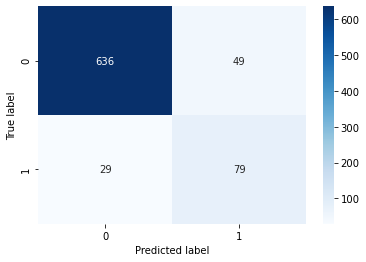

In [48]:
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier
#Instantiate the classifier
rf_clf= RandomForestClassifier(random_state=130)

#Fit on the training data
rf_clf.fit(resampled_X_train,resampled_y_train)
RandomForestClassifier(random_state=130)
#predict on the test data
y_pred_rf = rf_clf.predict(X_test)
plot_confusion_matrix(y_test, y_pred_rf, [0,1])


Here's a breakdown of the confusion matrix:

TP (True Positives): 79
TN (True Negatives): 636
FP (False Positives): 49
FN (False Negatives): 29
Now, you can calculate various evaluation metrics based on this confusion matrix, such as accuracy, precision, recall, and F1-score:

Accuracy: (TP + TN) / (TP + TN + FP + FN) = (79 + 636) / (79 + 636 + 49 + 29) = 715 / 793 ≈ 0.901

Precision: TP / (TP + FP) = 79 / (79 + 49) ≈ 0.617

Precision measures the percentage of true positive predictions among all the positive predictions made by the model.
Recall (Sensitivity): TP / (TP + FN) = 79 / (79 + 29) ≈ 0.731

Recall measures the percentage of true positive predictions among all the actual positive samples in the dataset.
F1-Score: 2 * (Precision * Recall) / (Precision + Recall) ≈ 0.670

The F1-Score is the harmonic mean of precision and recall, providing a balance between the two metrics.
This confusion matrix indicates that the model has relatively high accuracy and is better at correctly predicting the negative class (TN) than the positive class (TP). The precision and recall values suggest that the model's performance for the positive class is decent but could be further improved.







In [49]:
#confirm the above culculation by printing the classification report
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.96      0.93      0.94       685
         1.0       0.62      0.73      0.67       108

    accuracy                           0.90       793
   macro avg       0.79      0.83      0.81       793
weighted avg       0.91      0.90      0.91       793



- The model performs quite well, with a high overall accuracy of 90%.
- It's particularly good at classifying class 0.0 with high precision and recall.
- Class 1.0 also has decent recall but lower precision, which means it's better at identifying class 1.0 samples but has more false positives.
- The F1-Score provides a balance between precision and recall, and we can use it to assess the trade-off between these metrics.
- The macro and weighted average metrics provide an overall view of the model's performance, considering both class-specific metrics and class imbalances.

This model is already doing well with a high accuracy and F1-scores.

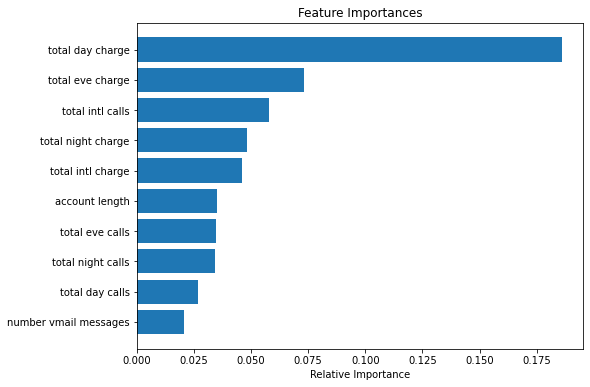

In [50]:
feature_names = list(resampled_X_train.columns)
importances = rf_clf.feature_importances_[0:10]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


According to the model, total day charge, total eve charge, total int call are the top three most important features

# EVALUATION

Model Evaluation  will allow us to assess how well our model performs on unseen data and make informed decisions about its suitability for our task. 

## Models Comparison 

we will use recall score .The recall score is a measure of how many of the positive instances the model correctly identifies. A higher recall score indicates that the model is better at identifying positive instances.

In [51]:
from sklearn.metrics import recall_score
np.random.seed(123)

classifiers = [LogisticRegression(),
               RandomForestClassifier(),
               DecisionTreeClassifier(),
              KNeighborsClassifier()]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'recall'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(resampled_X_train, resampled_y_train)
    y_pred = model.predict(X_test)
    
    recall = recall_score(y_test, y_pred)
    
    result_table = result_table.append({'classifiers': cls.__class__.__name__,
                                        'recall': recall}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

result_table

recall
classifiers                     
LogisticRegression      0.703704
RandomForestClassifier  0.731481
DecisionTreeClassifier  0.740741
KNeighborsClassifier    0.509259

Among the four classifiers, the Decision Tree Classifier has the highest recall score, indicating a better ability to correctly identify positive samples compared to the other models.

The Random Forest Classifier and Logistic Regression also have reasonably good recall scores, with the Random Forest slightly outperforming Logistic Regression.

The K-Neighbors Classifier has the lowest recall score, suggesting that it may miss a significant number of positive cases.

The choice of the best classifier depends on other factors such as precision, accuracy, F1-score, computational complexity, and the specific requirements of our problem. 

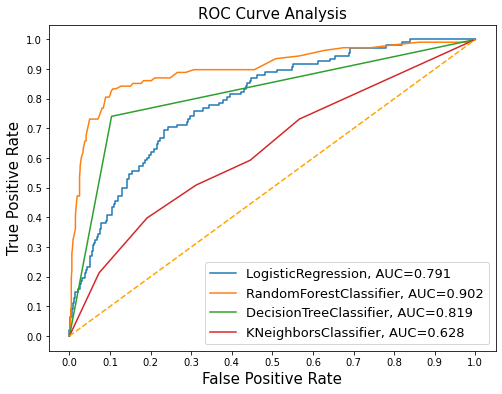

In [52]:
from sklearn.metrics import roc_curve, roc_auc_score

np.random.seed(123)
classifiers = [LogisticRegression(),
               RandomForestClassifier(),
               DecisionTreeClassifier(),
             KNeighborsClassifier()]


# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(resampled_X_train, resampled_y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

Recall is useful for assessing the model's performance at a specific threshold, while the ROC curve gives a broader view of the model's overall discriminatory power across various thresholds. Therefore, while there is often a correlation between recall and the ROC curve, they may not always provide identical comparison results, and both are valuable tools in evaluating classification models.A higher AUC score indicates that the classifier is better at distinguishing between positive and negative instances.in our case Random forest classifire has the highest AUC score of 0.902

# Model Tuning

model tuning is often referred to as hyperparameter tuning, is the process of optimizing the hyperparameters of a machine learning model to improve its performance. Hyperparameters are settings or configurations that are not learned from the data but are set before training the model. Proper tuning can significantly impact a model's performance. we will tune the best perfoming mordel according to the Recall score and the ROC curve which is the Random Forest and Decision tree model

## tuning decision tree

In [53]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters and their possible values for tuning
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# Create an instance of the 
dt = DecisionTreeClassifier(random_state = 130)
# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(dt_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create the tuned Decision Tree Classifier with the best hyperparameters
tuned_dt_classifier = DecisionTreeClassifier(random_state=130, **best_params)
tuned_dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='auto',
                       min_samples_leaf=4, min_samples_split=10,
                       random_state=130)

In [54]:
#Predict on the test data
y_pred_tuned = tuned_dt_classifier.predict(X_test)

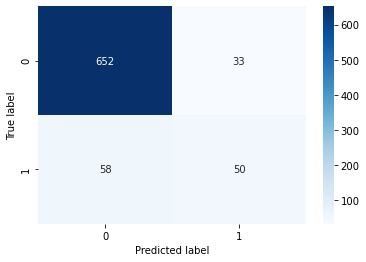

In [55]:
#The confusion matrix
plot_confusion_matrix(y_test, y_pred_tuned, [0,1])

In [56]:
#print the classification report
print(classification_report(y_test,y_pred_tuned))

              precision    recall  f1-score   support

         0.0       0.92      0.95      0.93       685
         1.0       0.60      0.46      0.52       108

    accuracy                           0.89       793
   macro avg       0.76      0.71      0.73       793
weighted avg       0.88      0.89      0.88       793



These metrics are often used to evaluate the performance of a classification model. It seems like the model is performing well for class 0.0 with high precision and recall, but its performance is weaker for class 1.0, with a lower precision and recall. The weighted average metrics (precision, recall, and F1-score) give an overall assessment of the model's performance, taking into account the class imbalances.

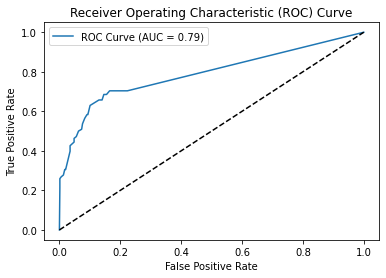

In [57]:
# Get the predicted probabilities for the positive class
y_proba = tuned_dt_classifier.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

The model performs quite well for class 0.0, with high precision and recall, indicating a good ability to correctly identify negative cases.
Class 1.0, the positive class, has lower precision and recall, indicating that the model struggles to correctly identify positive cases. It has a lower F1-Score for class 1.0.
The model's overall accuracy is decent, but the performance on class 1.0 needs improvement. Depending on the problem, you may need to focus on strategies to enhance the model's ability to detect positive cases while maintaining a high level of precision.
The model has a recall score of 0.46, which means model is able to capture 46% of the actual churned customers.this makes our model not really strong to make accurate prediction

## Random forest tuning

In [58]:
#Define the hyperparameter grid
param_grid = {
    "max_depth": [8,15,20],
    "n_estimators":[500,1000],
    "min_samples_split":[5,10,15],
    "criterion":['entropy','gini']
    }
# Create an instance of the RandomForest classifier
rf = RandomForestClassifier(random_state = 123)
# Create GridSearchCV object with the defined parameter grid and scoring metric
grid_search = GridSearchCV(rf, param_grid, cv=3, n_jobs=-1, verbose=False)

#Fit the GridsearchCV object to the training data
grid_search.fit(resampled_X_train,resampled_y_train)

#print the best parameters
print(grid_search.best_params_)
{'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 1000}
# Create an instance of the RandomForest classifier with best params
rf_tuned = RandomForestClassifier(criterion = 'entropy',
                                  max_depth = 20,
                                  min_samples_split = 5,
                                  n_estimators = 1000,
                                  random_state=123)
#Fit the model on the training data
rf_tuned.fit(resampled_X_train, resampled_y_train)

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 1000}


RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=5,
                       n_estimators=1000, random_state=123)

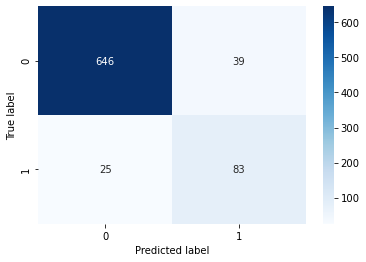

In [59]:
#Predict on the test data
y_pred_tuned = rf_tuned.predict(X_test)
#The confusion matrix
plot_confusion_matrix(y_test, y_pred_tuned, [0,1])

In [60]:
#print the classification report
print(classification_report(y_test,y_pred_tuned))

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95       685
         1.0       0.68      0.77      0.72       108

    accuracy                           0.92       793
   macro avg       0.82      0.86      0.84       793
weighted avg       0.92      0.92      0.92       793



The model performs very well for class 0.0, with high precision, recall, and F1-score, indicating a strong ability to correctly identify negative cases.
Class 1.0, the positive class, has lower precision than class 0.0, but it has a relatively good recall and F1-score. This means the model is reasonably effective at identifying positive cases.
The model's overall accuracy is high, indicating that it performs well on both classes.
The macro and weighted averages suggest a balanced performance across the two classes.
Overall, this model appears to be performing well in its ability to classify samples into the two classes, with a slight emphasis on the negative class (class 0.0) due to its higher support.

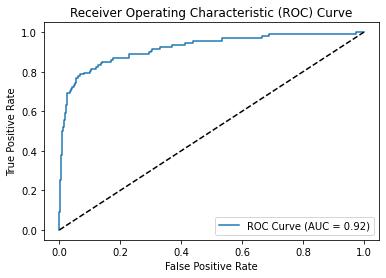

In [61]:
# Get the predicted probabilities for the positive class
y_proba = rf_tuned.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Based on the ROC curve and the recall metric, the tuned Random Forest model performs well in distinguishing between positive and negative classes (churned and non-churned customers) and in correctly identifying churned customers.The model has a recall score of 0.77, which means model is able to capture 77% of the actual churned customers.

# CONCLUSION



Our Random Forest classifier achieved a recall score of 77%, indicating a good predictive model for customer churn. However, further feature engineering could potentially improve the recall score. In summary, we successfully achieved our objective of predicting customer churn with an acceptable level of recall.



# Recommendations:

## 1. Pricing Structure Evaluation:

Evaluate the pricing structure for day, evening, night, and international charges. Consider adjusting pricing plans or introducing discounted packages to address the pricing concerns associated with customers who are more likely to churn.


## 2. Improve Customer Service:

Enhance the quality of customer service and reduce the number of customer service calls. Implement comprehensive training programs for customer service representatives to ensure efficient issue resolution, leading to increased customer satisfaction and reduced churn.

## 3. Targeted Incentives:

Offer discounts or promotional offers to customers in area codes 415 and 510, which experience a higher churn rate. These incentives can motivate customers to stay with the company.

## 4. Voicemail Plan Enhancement:

Enhance the value proposition of the voicemail plan to increase adoption among customers. Highlight the benefits and convenience of voicemail services and consider offering additional features or discounts to encourage customer sign-ups.tates.

## 5. State-Specific Strategies:

Focus on customer retention strategies in states with higher churn rates, such as Texas, New Jersey, Maryland, Miami, and New York. Tailor marketing campaigns, offers, and support to meet the specific needs and preferences of customers in these states